In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str
    name: str
    age: int

In [2]:
def node_1(state: State) -> State: 
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state: State) -> State:
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state: State) -> State:
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

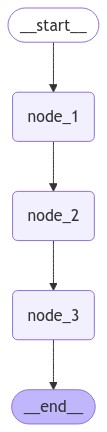

In [3]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
---Node 2---
---Node 3---


{'graph_state': 'Hi, this is Lance. I am happy! sad!'}

In [5]:
import random
from typing import Literal

def decide_mood(state: State) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

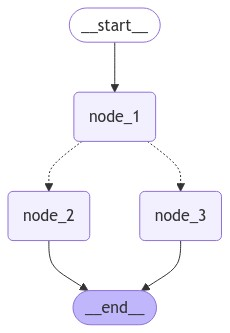

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
---Node 2---


{'graph_state': 'Hi, this is Lance. I am happy!'}